# EDA and Labeling

Use this notebook to explore the dataset and run the labeling step interactively.


### 1. Imports & Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../data/labeled_lyrics_cleaned.csv")
df.head()

,Unnamed: 0,artist,seq,song,label
0,0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0.626
1,1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,0.630
2,2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside,0.240
3,3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,0.536
4,4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.371


### 2. Basic Data Inspection

Total rows: 158353
Columns: Index(['Unnamed: 0', 'artist', 'seq', 'song', 'label'], dtype='object')
        Unnamed: 0                 artist  \
62672        62672          Sarah Vaughan   
97869        97869  Susan & the Surftones   
157744      157744            Mindy Smith   
2701          2701          Living Colour   
25808        25808          Joni Mitchell   

                                                      seq             song  \
62672   He makes welcome with his eyes\r\nThey tell me...     Wanting More   
97869   Somebody called me on the phone\nThey said, "H...     Chinese Rock   
157744  Seems like\r\nOut of nowhere\r\nI'm coming apa...          Falling   
2701    Starts from the back of your head\r\nShifts to...  Never Satisfied   
25808   It fell from midnight skies\r\nIt drummed on t...   Paprika Plains   

         label  
62672   0.1490  
97869   0.8650  
157744  0.0798  
2701    0.2920  
25808   0.0727  
Unnamed: 0    0
artist        0
seq           0
song      

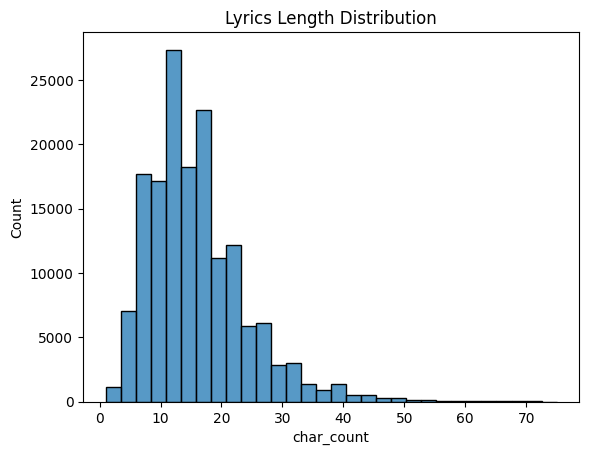

In [2]:
print("Total rows:", len(df))
print("Columns:", df.columns)

print(df.sample(5))

# Are there nulls?
print(df.isnull().sum())

# Character counts for lyrics
df["char_count"] = df["song"].str.len()
sns.histplot(df["char_count"], bins=30)
plt.title("Lyrics Length Distribution")
plt.show()

### 3. Class (Label) Distribution

label
0.96100    403
0.96200    341
0.96300    301
0.96400    276
0.35600    260
          ... 
0.02430      1
0.00359      1
0.00991      1
0.02880      1
0.02150      1
Name: count, Length: 1684, dtype: int64


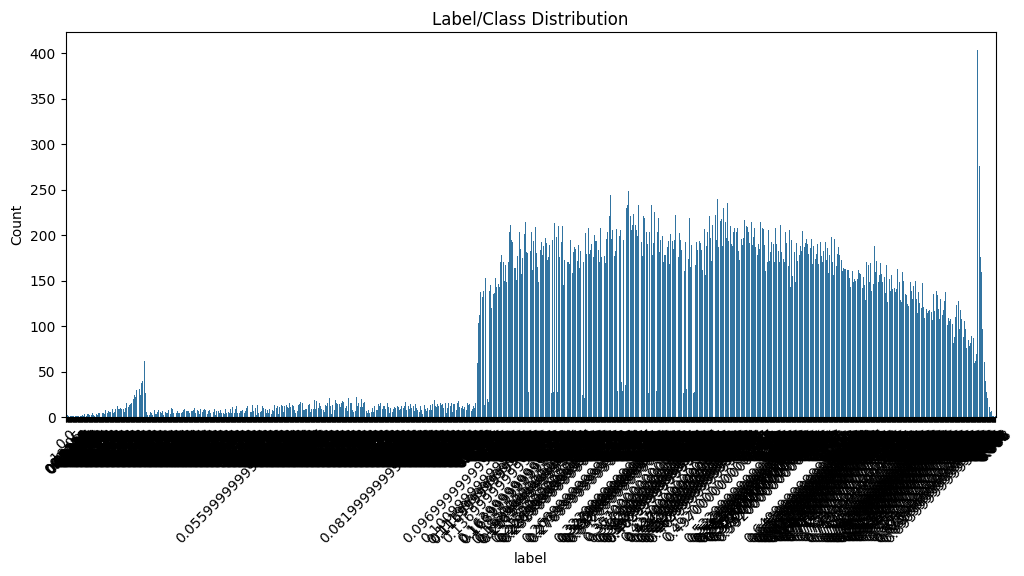

Classes with <2 samples: [0.0295, 0.0276, 0.988, 0.0284, 0.0259, 0.0317, 0.0244, 0.0269, 0.0246, 0.0149, 0.0256, 0.0325, 0.0305, 0.00049, 0.0236, 0.0319, 0.058, 0.0267, 0.0242, 0.0154, 0.0169, 0.0187, 0.996, 0.0339, 0.0312, 0.0271, 0.0222, 0.998, 0.0251, 0.0121, 0.0106, 0.0266, 0.0306, 0.995, 0.016, 0.0286, 0.042, 0.993, 0.0336, 0.00428, 0.0253, 0.0297, 0.0307, 0.0314, 0.0243, 0.00359, 0.00991, 0.0288, 0.0215]


In [3]:
label_counts = df["label"].value_counts()
print(label_counts)

plt.figure(figsize=(12,5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks(rotation=45)
plt.title("Label/Class Distribution")
plt.ylabel("Count")
plt.show()

# Rare classes?
rare = label_counts[label_counts < 2].index
print(f"Classes with <2 samples: {list(rare)}")

### 4. Convert numeric scores to categorical labels (binning)

label_cat
sadness    39625
fear       39024
anger      34051
neutral    23542
joy        22111
Name: count, dtype: int64


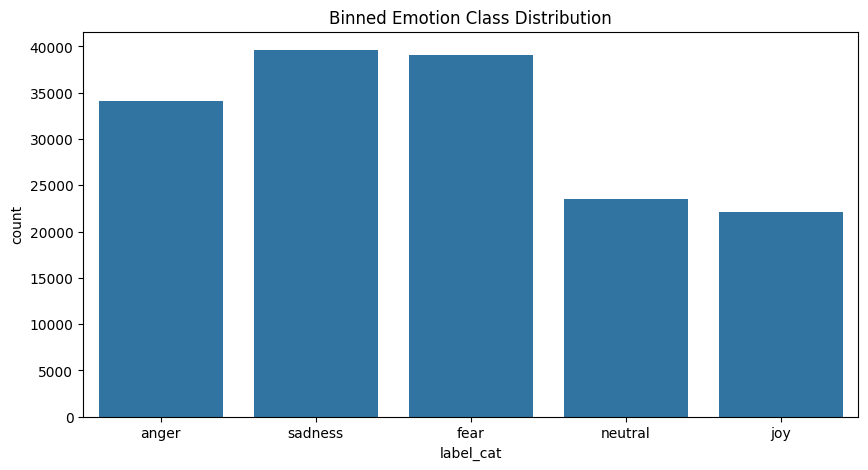

In [4]:
def score_to_emotion(score):
    if score >= 0.8:
        return "joy"
    elif score >= 0.6:
        return "anger"
    elif score >= 0.4:
        return "fear"
    elif score >= 0.2:
        return "sadness"
    else:
        return "neutral"

df["label_cat"] = df["label"].apply(score_to_emotion)
print(df["label_cat"].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x=df["label_cat"])
plt.title("Binned Emotion Class Distribution")
plt.show()

### 5. Remove Rare Classes

In [5]:
label_counts = df["label_cat"].value_counts()
rare = label_counts[label_counts < 2].index
df_clean = df[~df["label_cat"].isin(rare)].reset_index(drop=True)
print("Classes removed (rare):", list(rare))
print("Shape after cleaning:", df_clean.shape)

Classes removed (rare): []
Shape after cleaning: (158353, 7)


### 6. Train/test split with stratification on categorical labels


In [6]:
from sklearn.model_selection import train_test_split

X = df_clean["song"]
y = df_clean["label_cat"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (126682,)
Test shape: (31671,)


### 7. Baseline model prediction and evaluation

c:\Users\anjuv\OneDrive\Documents\GitHub\150K-Lyrics-Classifier\stream\lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.7.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\anjuv\OneDrive\Documents\GitHub\150K-Lyrics-Classifier\stream\lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.7.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\anjuv\OneDrive\Documents\GitHub\150K-Lyrics-Classifier\stream\lib\site-packages\sklearn\base.py:442: Inc

First 5 predictions: ['joy' 'joy' 'joy' 'joy' 'joy']
First 5 true labels: ['joy' 'neutral' 'neutral' 'fear' 'anger']


c:\Users\anjuv\OneDrive\Documents\GitHub\150K-Lyrics-Classifier\stream\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\anjuv\OneDrive\Documents\GitHub\150K-Lyrics-Classifier\stream\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\anjuv\OneDrive\Documents\GitHub\150K-Lyrics-Classifier\stream\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

              precision    recall  f1-score   support

       anger       0.22      0.33      0.27      6810
     disgust       0.00      0.00      0.00         0
        fear       0.25      0.25      0.25      7805
         joy       0.14      0.41      0.21      4422
     neutral       0.00      0.00      0.00      4709
     sadness       0.28      0.04      0.07      7925
    surprise       0.00      0.00      0.00         0

    accuracy                           0.20     31671
   macro avg       0.13      0.15      0.11     31671
weighted avg       0.20      0.20      0.16     31671



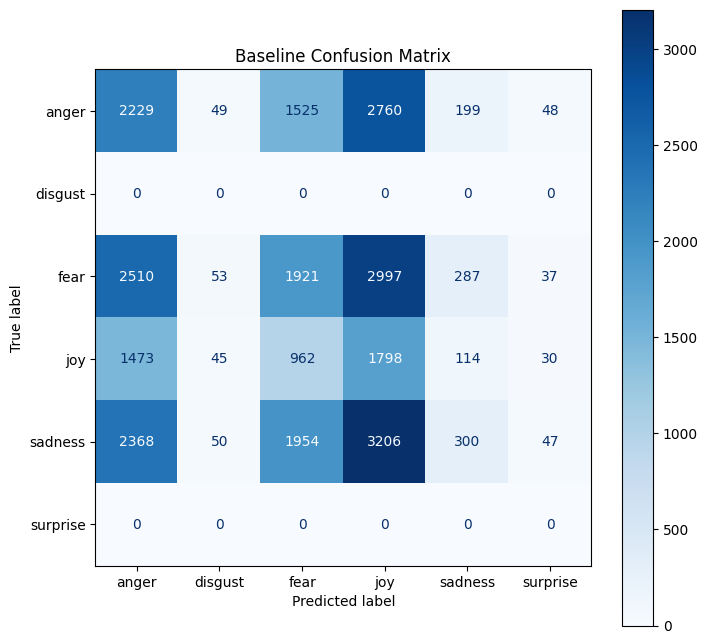

In [7]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

baseline_model = joblib.load("../models/baseline.pkl")
y_pred_base = baseline_model.predict(X_test)

print("First 5 predictions:", y_pred_base[:5])
print("First 5 true labels:", y_test.values[:5])

# Metrics
report_base = classification_report(y_test, y_pred_base)
print(report_base)

# Confusion Matrix
cm_base = confusion_matrix(y_test, y_pred_base, labels=baseline_model.classes_)
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay(cm_base, display_labels=baseline_model.classes_).plot(ax=ax, cmap="Blues")
plt.title("Baseline Confusion Matrix")
plt.show()

### 8. Save metrics and plots

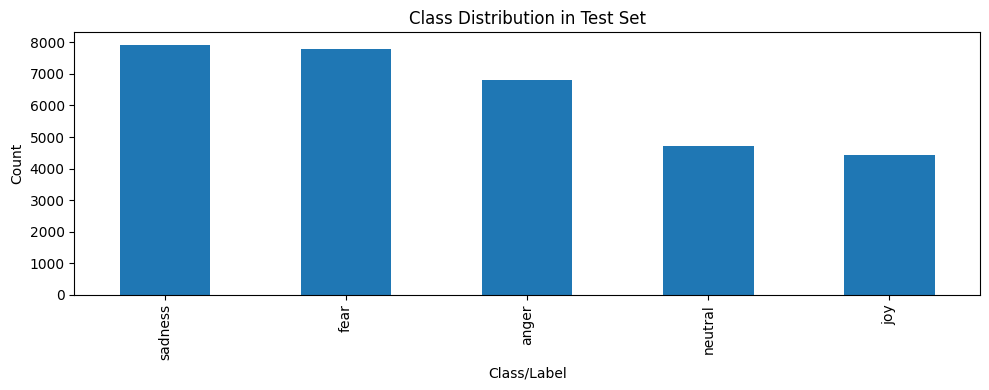

EDA, labeling, train/test split, baseline evaluation, and plotting complete!


<Figure size 640x480 with 0 Axes>

In [ ]:
import os
os.makedirs("../results", exist_ok=True)

with open("../results/classification_report_baseline.txt", "w") as f:
    f.write(report_base)

fig.savefig("../results/confusion_matrix_baseline.png")

# 9. Distribution plot on cleaned/test labels
plt.figure(figsize=(10,4))
y_test.value_counts().plot(kind='bar')
plt.title("Class Distribution in Test Set")
plt.xlabel("Class/Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.savefig("../results/class_distribution_testset.png")

# --- END ---
print("EDA, labeling, train/test split, baseline evaluation, and plotting complete!")